# EDA

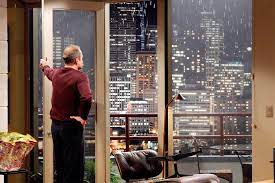

In [9]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [10]:
# Load the data
df = pd.read_csv('data/eda.csv')
#df.head()

#My client is looking for a house with no waterfront, so lets drop all the rows with missing values in the waterfront column
df.dropna(subset=['waterfront'], inplace=True)
df.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price
1,6414100192,3.000,2.250,2570.000,7242.000,2.000,0.000,0.000,3,7,...,400.000,1951,19910.000,98125,47.721,-122.319,1690.000,7639.000,2014-12-09,538000.000
2,5631500400,2.000,1.000,770.000,10000.000,1.000,0.000,0.000,3,6,...,0.000,1933,NaN,98028,47.738,-122.233,2720.000,8062.000,2015-02-25,180000.000
3,2487200875,4.000,3.000,1960.000,5000.000,1.000,0.000,0.000,5,7,...,910.000,1965,0.000,98136,47.521,-122.393,1360.000,5000.000,2014-12-09,604000.000
4,1954400510,3.000,2.000,1680.000,8080.000,1.000,0.000,0.000,3,8,...,0.000,1987,0.000,98074,47.617,-122.045,1800.000,7503.000,2015-02-18,510000.000
5,7237550310,4.000,4.500,5420.000,101930.000,1.000,0.000,0.000,3,11,...,1530.000,2001,0.000,98053,47.656,-122.005,4760.000,101930.000,2014-05-12,1230000.000


In [36]:
#display 50 most expensive houses to see in which areas they are located
most_expensive_houses = df.nlargest(50, 'price')
most_expensive_houses

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price
7245,6762700020,6.000,8.000,12050.000,27600.000,2.500,0.000,3.000,4,13,...,3480.000,1910,19870.000,98102,47.630,-122.323,3940.000,8800.000,2014-10-13,7700000.000
3910,9808700762,5.000,4.500,10040.000,37325.000,2.000,1.000,2.000,3,11,...,2360.000,1940,20010.000,98004,47.650,-122.214,3930.000,25449.000,2014-06-11,7060000.000
9245,9208900037,6.000,7.750,9890.000,31374.000,2.000,0.000,4.000,3,13,...,1030.000,2001,0.000,98039,47.630,-122.240,4540.000,42730.000,2014-09-19,6890000.000
4407,2470100110,5.000,5.750,9200.000,35069.000,2.000,0.000,0.000,3,13,...,3000.000,2001,NaN,98039,47.629,-122.233,3560.000,24345.000,2014-08-04,5570000.000
1446,8907500070,5.000,5.000,8000.000,23985.000,2.000,0.000,4.000,3,12,...,1280.000,2009,0.000,98004,47.623,-122.220,4600.000,21750.000,2015-04-13,5350000.000
1313,7558700030,6.000,6.000,7390.000,24829.000,2.000,1.000,NaN,4,12,...,2390.000,1991,0.000,98040,47.563,-122.210,4320.000,24619.000,2015-04-13,5300000.000
1162,1247600105,5.000,5.250,8010.000,45517.000,2.000,1.000,4.000,3,12,...,2020.000,1999,0.000,98033,47.677,-122.211,3430.000,26788.000,2014-10-20,5110000.000
8085,1924059029,5.000,6.750,9640.000,13068.000,1.000,1.000,4.000,3,12,...,4820.000,1983,20090.000,98040,47.557,-122.210,3270.000,10454.000,2014-06-17,4670000.000
2624,7738500731,5.000,5.500,6640.000,40014.000,2.000,1.000,4.000,3,12,...,290.000,2004,0.000,98155,47.749,-122.280,3030.000,23408.000,2014-08-15,4500000.000
8629,3835500195,4.000,3.000,6430.000,27517.000,2.000,0.000,0.000,3,12,...,0.000,2001,0.000,98004,47.621,-122.219,3720.000,14592.000,2014-06-18,4490000.000


In [256]:
#Creates a map centered at a specific location
m = folium.Map(location=[47.6, -122.3], zoom_start=10)

# Iterate over the 50 most expensive houses dataframe
for index, row in most_expensive_houses.iterrows():
    folium.Marker(
        location=[row['lat'], row['long']],
        popup=f"Price: ${row['price']}",
        icon=folium.Icon(color='red', icon='home')
    ).add_to(m)
    
# Display 50 most expensive houses on the map
m

In [18]:
#after inspecting the map, we can see that most of the houses are located in the same area, 
#so we can group them by zipcode
zipcode_counts = most_expensive_houses['zipcode'].value_counts().reset_index()
zipcode_counts.columns = ['zipcode', 'count']
zipcode_counts = zipcode_counts.sort_values('count', ascending=False)
zipcode_counts


,zipcode,count
0,98004,12
1,98039,7
2,98040,6
3,98008,4
4,98034,3
5,98112,3
6,98033,2
7,98006,2
13,98144,1
17,98155,1


Top of most expensive houses are located in 98004 Bellevue (12), 98039 Medina (7), 98040 Mercer Island (6)

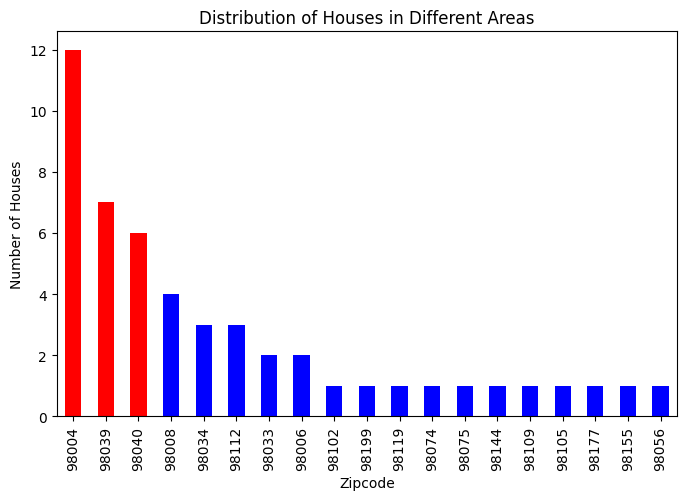

In [158]:
#Lets display three most expensive districts with red on the plot chart

# Count the occurrences of each unique value in the 'zipcode' column
zipcode_counts = most_expensive_houses['zipcode'].value_counts()

# Get the top 3 zip codes with the highest counts
top_3_zipcodes = zipcode_counts.nlargest(3)

# Create a color map, defaulting to blue and setting top 3 to red
colors = ['red' if zipcode in top_3_zipcodes.index else 'blue' for zipcode in zipcode_counts.index]

# Create the bar plot
zipcode_counts.plot(kind='bar', color=colors)

# Set the labels and title
plt.xlabel('Zipcode')
plt.ylabel('Number of Houses')
plt.title('Distribution of Houses in Different Areas')

# Display the plot
plt.show()


In [26]:
#To find out what is a big lot I decided to use the median value of the lot size
median_lot_size = df['sqft_lot'].median()
print(median_lot_size)
#7620 is the median lot size



7620.0


,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price
779,1954700695,5.000,4.250,4860.000,9453.000,1.500,0.000,1.000,5,10,...,1760.000,1905,0.000,98112,47.620,-122.286,3150.000,8557.000,2014-06-12,2250000.000
4855,1338300170,5.000,4.000,4690.000,8208.000,2.000,0.000,0.000,3,9,...,1650.000,1926,0.000,98112,47.632,-122.304,3300.000,8001.000,2015-03-24,2050000.000
5961,5249800010,4.000,4.250,6410.000,43838.000,2.500,0.000,2.000,4,12,...,800.000,1906,0.000,98144,47.570,-122.280,2270.000,6630.000,2014-12-03,2730000.000
7184,7159200005,7.000,4.500,6210.000,8856.000,2.500,0.000,2.000,5,11,...,1450.000,1910,0.000,98109,47.631,-122.354,2940.000,5400.000,2014-05-07,3200000.000
7245,6762700020,6.000,8.000,12050.000,27600.000,2.500,0.000,3.000,4,13,...,3480.000,1910,19870.000,98102,47.630,-122.323,3940.000,8800.000,2014-10-13,7700000.000
15152,3304700130,4.000,4.000,3860.000,67953.000,2.000,0.000,2.000,4,12,...,0.000,1927,0.000,98177,47.747,-122.378,4410.000,128066.000,2015-01-28,1760000.000
15539,1732801150,4.000,4.750,3970.000,9778.000,2.000,0.000,2.000,4,11,...,580.000,1928,0.000,98119,47.631,-122.366,3970.000,8460.000,2014-07-01,2300000.000
18314,5317100750,4.000,4.750,4575.000,24085.000,2.500,0.000,2.000,5,10,...,670.000,1926,0.000,98112,47.626,-122.284,3900.000,9687.000,2014-07-11,2920000.000
18462,1346300150,8.000,4.000,7710.000,11750.000,3.500,0.000,0.000,5,12,...,1620.000,1904,0.000,98112,47.626,-122.314,4210.000,8325.000,2014-10-20,3300000.000
18711,239000155,5.000,4.500,3540.000,21217.000,2.000,0.000,0.000,4,8,...,600.000,1926,0.000,98188,47.427,-122.280,1290.000,12040.000,2015-01-05,707000.000


The median size for the lot is 7620 sqft, so I consider big lots are bigger than this value.

In [259]:
#display houses with matching clients criteria
bath_nowater_biglot_old_filtered_houses = df[(df['bathrooms'] >= 4) & (df['waterfront'] == 0.00) & (df['sqft_lot'] > median_lot_size) & (df['yr_built'] <= 1974)]
#bath_nowater_biglot_old_filtered_houses

#sort the houses by price
bath_nowater_biglot_old_filtered_houses_sorted = bath_nowater_biglot_old_filtered_houses.sort_values('price', ascending=False)
bath_nowater_biglot_old_filtered_houses_sorted



,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price
7245,6762700020,6.000,8.000,12050.000,27600.000,2.500,0.000,3.000,4,13,...,3480.000,1910,19870.000,98102,47.630,-122.323,3940.000,8800.000,2014-10-13,7700000.000
10435,1118000320,4.000,4.000,4260.000,11765.000,2.000,0.000,0.000,3,11,...,980.000,1939,20100.000,98112,47.638,-122.288,4260.000,10408.000,2015-05-08,3400000.000
18462,1346300150,8.000,4.000,7710.000,11750.000,3.500,0.000,0.000,5,12,...,1620.000,1904,0.000,98112,47.626,-122.314,4210.000,8325.000,2014-10-20,3300000.000
7900,1068000375,6.000,5.000,7100.000,18200.000,2.500,0.000,0.000,3,13,...,1860.000,1933,20020.000,98199,47.643,-122.408,3130.000,6477.000,2014-09-23,3200000.000
7184,7159200005,7.000,4.500,6210.000,8856.000,2.500,0.000,2.000,5,11,...,1450.000,1910,0.000,98109,47.631,-122.354,2940.000,5400.000,2014-05-07,3200000.000
18314,5317100750,4.000,4.750,4575.000,24085.000,2.500,0.000,2.000,5,10,...,670.000,1926,0.000,98112,47.626,-122.284,3900.000,9687.000,2014-07-11,2920000.000
14542,2303900035,5.000,6.250,8670.000,64033.000,2.000,0.000,4.000,3,13,...,2550.000,1965,NaN,98177,47.730,-122.372,4140.000,81021.000,2014-06-11,2890000.000
5961,5249800010,4.000,4.250,6410.000,43838.000,2.500,0.000,2.000,4,12,...,800.000,1906,0.000,98144,47.570,-122.280,2270.000,6630.000,2014-12-03,2730000.000
3381,1118001408,5.000,4.750,5410.000,13431.000,2.000,0.000,0.000,4,10,...,360.000,1941,0.000,98112,47.631,-122.288,3750.000,11596.000,2014-11-24,2540000.000
3018,3377900195,4.000,5.500,6930.000,45100.000,1.000,0.000,0.000,4,11,...,NaN,1950,19910.000,98006,47.555,-122.144,2560.000,37766.000,2014-09-29,2530000.000


There are 46 houses matching clients criteria - to have 4 or more bathrooms, have no waterfront, have a big lot and be historic.
The other criteria as small house nearby (as we choose "OR 4 bathrooms), Tennis and pool on the lot (unavailable data), golf nearby were not considered.

In [ ]:
# Create a map centered at a specific location
m = folium.Map(location=[47.6, -122.3], zoom_start=10)

# Iterate over the filtered houses dataframe
for index, row in bath_nowater_biglot_old_filtered_houses.iterrows():
    folium.Marker(
        location=[row['lat'], row['long']],
        popup=f"Price: ${row['price']}",
        icon=folium.Icon(color='red', icon='home')
    ).add_to(m)
    
# Display the map
m

In [ ]:
#display most 3  expensive houses on the map
# Create a map centered at a specific location
m = folium.Map(location=[47.6, -122.3], zoom_start=10)

# Iterate over the first three rows of the DataFrame
for index, row in bath_nowater_biglot_old_filtered_houses_sorted.head(3).iterrows():
    folium.Marker(
        location=[row['lat'], row['long']],
        popup=f"Price: ${row['price']}",
        icon=folium.Icon(color='red', icon='home')
    ).add_to(m)
    
# Display the map
m

In [260]:
# Print the top 3 most expensive houses that match the client's criteria
for index, row in bath_nowater_biglot_old_filtered_houses_sorted.head(3).iterrows():
    print(f"- Offer ID: {row['id']}")
    print(f"  Bedrooms: {row['bedrooms']}")
    print(f"  Bathrooms: {row['bathrooms']}")
    print(f"  Sqft Living: {row['sqft_living']}")
    print(f"  Sqft Lot: {row['sqft_lot']}")
    print(f"  Floors: {row['floors']}")
    print(f"  Waterfront: {row['waterfront']}")
    print(f"  View: {row['view']}")
    print(f"  Condition: {row['condition']}")
    print(f"  Grade: {row['grade']}")
    #print(f"  Sqft Above: {row['sqft_above']}")
    #print(f"  Sqft Basement: {row['sqft_basement']}")
    print(f"  Year Built: {row['yr_built']}")
    print(f"  Year Renovated: {row['yr_renovated']}")
    #print(f"  Zipcode: {row['zipcode']}")
    #print(f"  Latitude: {row['lat']}")
    #print(f"  Longitude: {row['long']}")
    #print(f"  Sqft Living15: {row['sqft_living15']}")
    #print(f"  Sqft Lot15: {row['sqft_lot15']}")
    #print(f"  Date: {row['date']}")
    print(f"  Price: {row['price']}")
    print()

- Offer ID: 6762700020
  Bedrooms: 6.0
  Bathrooms: 8.0
  Sqft Living: 12050.0
  Sqft Lot: 27600.0
  Floors: 2.5
  Waterfront: 0.0
  View: 3.0
  Condition: 4
  Grade: 13
  Year Built: 1910
  Year Renovated: 19870.0
  Price: 7700000.0

- Offer ID: 1118000320
  Bedrooms: 4.0
  Bathrooms: 4.0
  Sqft Living: 4260.0
  Sqft Lot: 11765.0
  Floors: 2.0
  Waterfront: 0.0
  View: 0.0
  Condition: 3
  Grade: 11
  Year Built: 1939
  Year Renovated: 20100.0
  Price: 3400000.0

- Offer ID: 1346300150
  Bedrooms: 8.0
  Bathrooms: 4.0
  Sqft Living: 7710.0
  Sqft Lot: 11750.0
  Floors: 3.5
  Waterfront: 0.0
  View: 0.0
  Condition: 5
  Grade: 12
  Year Built: 1904
  Year Renovated: 0.0
  Price: 3300000.0



In [261]:
#lets prove the hypothesis that the houses with the best view, condition and grade are the most expensive

#lets find out what is the best possible view
best_view = df['view'].max()
print(best_view)
#4 is the highest view value

best_condition = df['condition'].max()
print(best_condition)
#5 is the best possible condition value

best_grade = df['grade'].max()
print(best_grade)
#13 is the best possible grade value

houses_with_view_4 = df[df['view'] == 4]
houses_with_view_4
#there are  298 houses with view 4

houses_with_condition_5 = df[df['condition'] == 5]
houses_with_condition_5
#there are 1510 houses with condition 5

houses_with_grade_13 = df[df['grade'] == 13]
houses_with_grade_13
#there are 13 houses with grade 13

4.0
5
13


,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price
4407,2470100110,5.000,5.750,9200.000,35069.000,2.000,0.000,0.000,3,13,...,3000.000,2001,NaN,98039,47.629,-122.233,3560.000,24345.000,2014-08-04,5570000.000
4807,9831200500,5.000,3.750,6810.000,7500.000,2.500,0.000,0.000,3,13,...,700.000,1922,0.000,98102,47.629,-122.322,2660.000,7500.000,2015-03-04,2480000.000
5446,7237501190,4.000,3.250,4890.000,13402.000,2.000,0.000,0.000,3,13,...,0.000,2004,0.000,98059,47.530,-122.131,5790.000,13539.000,2014-10-10,1780000.000
6035,1725059316,4.000,4.000,6330.000,13296.000,2.000,0.000,2.000,3,13,...,1430.000,2000,0.000,98033,47.649,-122.201,2200.000,9196.000,2014-11-20,2390000.000
7028,853200010,5.000,5.500,7050.000,42840.000,1.000,0.000,2.000,4,13,...,2730.000,1978,0.000,98004,47.623,-122.220,5070.000,20570.000,2014-07-01,3800000.000
7245,6762700020,6.000,8.000,12050.000,27600.000,2.500,0.000,3.000,4,13,...,3480.000,1910,19870.000,98102,47.630,-122.323,3940.000,8800.000,2014-10-13,7700000.000
7900,1068000375,6.000,5.000,7100.000,18200.000,2.500,0.000,0.000,3,13,...,1860.000,1933,20020.000,98199,47.643,-122.408,3130.000,6477.000,2014-09-23,3200000.000
9245,9208900037,6.000,7.750,9890.000,31374.000,2.000,0.000,4.000,3,13,...,1030.000,2001,0.000,98039,47.630,-122.240,4540.000,42730.000,2014-09-19,6890000.000
10362,3303850390,5.000,5.500,7400.000,18898.000,2.000,0.000,3.000,3,13,...,1110.000,2001,0.000,98006,47.543,-122.112,6110.000,26442.000,2014-12-12,2980000.000
13398,2426039123,5.000,4.750,7880.000,24250.000,2.000,0.000,2.000,3,13,...,0.000,1996,0.000,98177,47.733,-122.362,2740.000,10761.000,2015-01-30,2420000.000


In [174]:

#lets check the houses with the best possible view, condition and grade(10-13)
houses_with_condition_view_grade = df[(df['condition'].isin([5])) & (df['view'] == 4) & (df['grade'].between(10, 13))]
#houses_with_condition_view_grade
#there are 16 houses matching this criteria

#lets sort the houses by price
houses_with_condition_view_grade_sorted = houses_with_condition_view_grade.sort_values('price')
#houses_with_condition_view_grade_sorted
#the cheapest house matching this criteria is 995000$

mean_price_houses_with_condition_view_grade = houses_with_condition_view_grade['price'].mean()
mean_price_houses_with_condition_view_grade
print("The mean price of the houses with the best view, condition and grade is: ", mean_price_houses_with_condition_view_grade)

The mean price of the houses with the best view, condition and grade is:  2054687.5


In [265]:

mean_price = df['price'].mean()

# Calculate the percentage difference between the mean price and the price of the most expensive house
percentage_difference = ((mean_price_houses_with_condition_view_grade - mean_price) / mean_price) * 100
print(f"Difference in percent between mean all houses and mean 'good houses': {percentage_difference:.2f}%")

#calculate how much times it is more expensive than the average house
times_more_expensive = mean_price_houses_with_condition_view_grade / mean_price
print(f"'Good houses' houses are {times_more_expensive:.2f} times more expensive than the average house")




Difference in percent between mean all houses and mean 'good houses': 279.25%
'Good houses' houses are 3.79 times more expensive than the average house


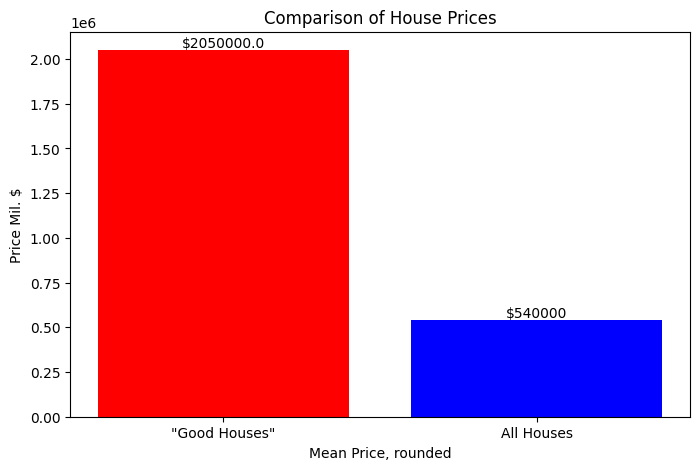

In [195]:
#LEts display it on on the bar plot
# Define the x-axis labels
labels = ['"Good Houses"', 'All Houses']

# Define the y-axis values
values = [matching_conditions_rounded, all_houses_mean_rounded]

# Define the colors for the bars
colors = ['red', 'blue']

# Create the bar plot
plt.bar(labels, values, color=colors)

# Set the labels and title
plt.xlabel('Mean Price, rounded')
plt.ylabel('Price Mil. $')
plt.title('Comparison of House Prices')

# Add labels to each bar
for i, v in enumerate(values):
    plt.text(i, v, f"${v}", ha='center', va='bottom')

# Display the plot
plt.show()

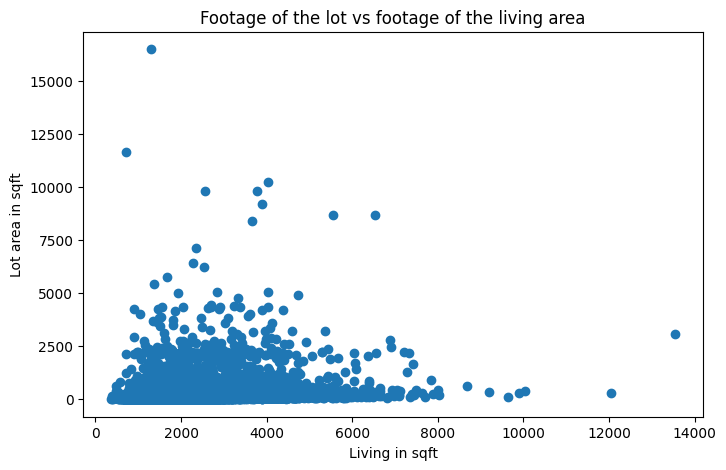

In [233]:
# lets proove the correlation between size of the lot and size of the living area
import matplotlib.pyplot as plt

#plt.scatter(df['sqft_lot'], df['sqft_living'])
plt.scatter(df['sqft_living'], df['sqft_lot']/100)


plt.xlabel(('Living in sqft'))
plt.ylabel('Lot area in sqft')
plt.title('Footage of the lot vs footage of the living area')

plt.show()

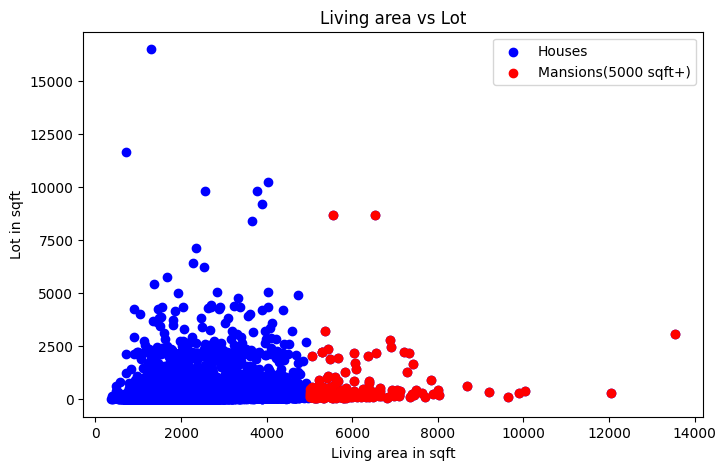

In [238]:
import matplotlib.pyplot as plt

# Create a scatter plot
plt.scatter(df['sqft_living'], df['sqft_lot']/100, color='blue', label='Houses')

# Filter the data where sqft_living is greater than 5000
filtered_data = df[df['sqft_living'] > 5000]

# Create a scatter plot for filtered data with red dots
plt.scatter(filtered_data['sqft_living'], filtered_data['sqft_lot']/100, color='red', label='Mansions(5000 sqft+)')

# Set the labels and title
plt.xlabel('Living area in sqft')
plt.ylabel('Lot in sqft')
plt.title('Living area vs Lot')

# Add a legend
plt.legend()

# Display the plot
plt.show()

In [225]:
#Lets proove  the correlation between size of the lot and size of the living area with pearson correlation
from scipy.stats import pearsonr

# Correlation Analysis

correlation_coefficient, p_value = pearsonr(df['sqft_living'], df['sqft_lot'])
print(f"Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

Correlation Coefficient: 0.17358831184293044
P-value: 8.658586580944932e-130


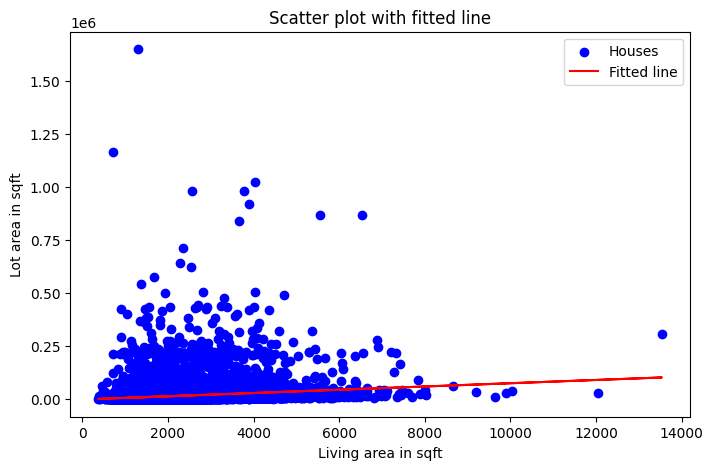

In [242]:
import matplotlib.pyplot as plt

# Create a scatter plot
plt.scatter(df['sqft_living'], df['sqft_lot'], color='blue', label='Houses')

# Fit a line to the data
slope, intercept, r_value, p_value, std_err = stats.linregress(df['sqft_living'], df['sqft_lot'])

# Create fitted line
line = slope * df['sqft_living'] + intercept

# Plot the fitted line
plt.plot(df['sqft_living'], line, color='red', label='Fitted line')

# Set the labels and title
plt.xlabel('Living area in sqft')
plt.ylabel('Lot area in sqft')
plt.title('Scatter plot with fitted line')

# Add a legend
plt.legend()

# Display the plot
plt.show()

Pearson correlation coefficient: 0.1736, p-value: 0.0000


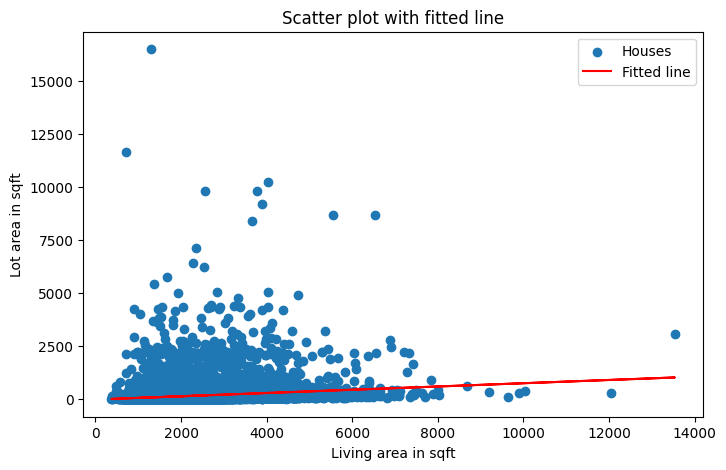

In [247]:
# Example data
x = df['sqft_living']
y = df['sqft_lot']/100

# Compute Pearson correlation coefficient
correlation, p_value = stats.pearsonr(x, y)
print(f"Pearson correlation coefficient: {correlation:.4f}, p-value: {p_value:.4f}")

# Fit a line to the data
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

# Create fitted line
line = slope * x + intercept

# Plot data and fitted line
plt.scatter(x, y, label='Houses')
plt.plot(x, line, color='red', label=f'Fitted line')
plt.xlabel('Living area in sqft')
plt.ylabel('Lot area in sqft')
plt.title('Scatter plot with fitted line')
plt.legend()
plt.show()

The correlation coefficient (0.17) indicates a weak positive relationship between lot size and house size. Despite the extremely low p-value (near zero) suggesting statistical significance, the weak correlation means there is practically no meaningful relationship between the two variables.


The results are almost not linear.

In [145]:
#Lets proove the correlation between size of the lot and size of the living area with spearman correlation
from scipy.stats import spearmanr

# Using Spearman's rank correlation
correlation_coefficient, p_value = spearmanr(df['sqft_lot'], df['sqft_living'])
print(f"Spearman's Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value:.10f}")


Spearman's Correlation Coefficient: 0.3046669769481303
P-value: 0.0000000000


The Spearman's correlation coefficient of 0.3047 indicates a moderate positive monotonic relationship between the size of the lot (sqft_lot) and the size of the living area (sqft_living). This suggests that as the size of the lot increases, the size of the living area tends to increase as well, though not perfectly.

The very small p-value (approximately 0.0) indicates that this relationship is statistically significant. Therefore, it is unlikely to have occurred by chance.

In summary, there is a statistically significant tendency for larger lots to be associated with larger living areas.

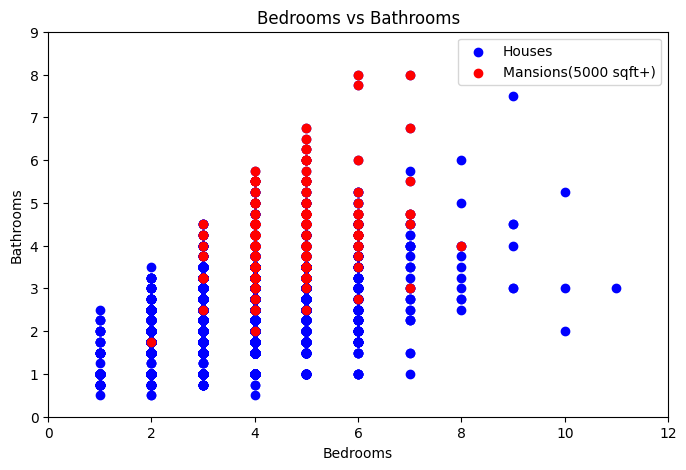

In [47]:
import matplotlib.pyplot as plt

# Create a scatter plot for houses
plt.scatter(df['bedrooms'], df['bathrooms'], color='blue', label='Houses')

# Create a scatter plot for mansions
plt.scatter(filtered_data['bedrooms'], filtered_data['bathrooms'], color='red', label='Mansions(5000 sqft+)')

plt.xlabel('Bedrooms')
plt.ylabel('Bathrooms')
plt.title('Bedrooms vs Bathrooms')

# Fix the x-axis and y-axis limits
plt.xlim(0, df['bedrooms'].max() + 1)
plt.ylim(0, df['bathrooms'].max() + 1)

# Add a legend
plt.legend()

plt.show()


In [20]:
#there is a house with 33 bedrooms, that is an outlier, lets remove it

house_with_most_bedrooms = df.loc[df['bedrooms'].idxmax()]
print(house_with_most_bedrooms)

df = df.drop(df[df['id'] == 2402100895].index)

id               1773100755
bedrooms             11.000
bathrooms             3.000
sqft_living        3000.000
sqft_lot           4960.000
floors                2.000
waterfront            0.000
view                  0.000
condition                 3
grade                     7
sqft_above         2400.000
sqft_basement       600.000
yr_built               1918
yr_renovated      19990.000
zipcode               98106
lat                  47.556
long               -122.363
sqft_living15      1420.000
sqft_lot15         4960.000
date             2014-08-21
price            520000.000
Name: 8748, dtype: object


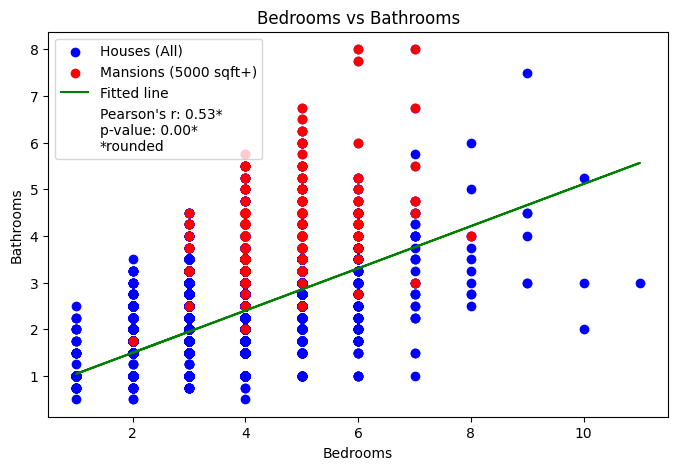

In [39]:
# Create a scatter plot
plt.scatter(df['bedrooms'], df['bathrooms'], color='blue', label='Houses (All)')

# Filter the data where sqft_living is greater than 5000
filtered_data = df[df['sqft_living'] > 5000]

# Create a scatter plot for filtered data with red dots
plt.scatter(filtered_data['bedrooms'], filtered_data['bathrooms'], color='red', label='Mansions (5000 sqft+)')

# Fit a line to the data
slope, intercept, r_value, p_value, std_err = stats.linregress(df['bedrooms'], df['bathrooms'])

# Create fitted line
line = slope * df['bedrooms'] + intercept

# Plot the fitted line
plt.plot(df['bedrooms'], line, color='green', label='Fitted line')

# Set the labels and title
plt.xlabel('Bedrooms')
plt.ylabel('Bathrooms')
plt.title('Bedrooms vs Bathrooms')

# Add the Pearson correlation coefficient and p-value to the legend
legend_text = f"Pearson's r: {r_value:.2f}*\np-value: {p_value:.2f}*\n*rounded"

# Create custom legend handles
handles, labels = plt.gca().get_legend_handles_labels()
handles.append(plt.Line2D([], [], color='none', label=legend_text))
labels.append(legend_text)

plt.legend(handles=handles, loc='upper left')

# Display the plot
plt.show()


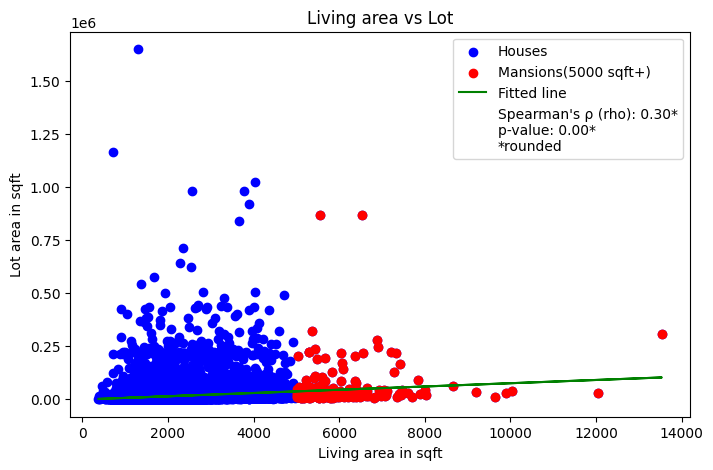

In [59]:
from scipy.stats import spearmanr

import matplotlib.pyplot as plt

# Create a scatter plot
plt.scatter(df['sqft_living'], df['sqft_lot'], color='blue', label='Houses')

# Filter the data where sqft_living is greater than 5000
filtered_data = df[df['sqft_living'] > 5000]

# Create a scatter plot for filtered data with red dots
plt.scatter(filtered_data['sqft_living'], filtered_data['sqft_lot'], color='red', label='Mansions(5000 sqft+)')

# Fit a line to the data
slope, intercept, r_value, p_value, std_err = stats.linregress(df['sqft_living'], df['sqft_lot'])

# Create fitted line
line = slope * df['sqft_living'] + intercept

# Plot the fitted line
plt.plot(df['sqft_living'], line, color='green', label='Fitted line')

# Set the labels and title
plt.xlabel('Living area in sqft')
plt.ylabel('Lot area in sqft')
plt.title('Living area vs Lot')

# Add the Spearman correlation coefficient rounded to the legend
legend_text = f"Spearman's ρ (rho): {r_value:.2f}*\np-value: *\n*rounded"

# Create custom legend handles
handles, labels = plt.gca().get_legend_handles_labels()
handles.append(plt.Line2D([], [], color='none', label=legend_text))
labels.append(legend_text)

plt.legend(handles=handles, loc='upper right')

# Display the plot
plt.show()


In [142]:
from scipy.stats import pearsonr

# Correlation Analysis for bedrooms and bathrooms
correlation_coefficient, p_value = pearsonr(df['bedrooms'], df['bathrooms'])
print(f"Pearson's Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value: .10f}.")


Pearson's Correlation Coefficient: 0.530884663805193
P-value:  0.0000000000.


The coefficient value of approximately 0.5309 suggests a moderate positive linear relationship between the number of bedrooms and bathrooms. This means that as the number of bedrooms increases, there tends to be a corresponding increase in the number of bathrooms.

In [211]:
from scipy.stats import spearmanr

# Using Spearman's rank correlation for bedrooms and bathrooms
correlation_coefficient, p_value = spearmanr(df['bedrooms'], df['bathrooms'])
print(f"Spearman's Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}.")


Spearman's Correlation Coefficient: 0.5237716861749133
P-value: 0.0.


In [60]:
from scipy.stats import shapiro

# Shapiro-Wilk test for normality
stat, p_bedrooms = shapiro(df['bedrooms'])
stat, p_bathrooms = shapiro(df['bathrooms'])
stat, p_house_size = shapiro(df['sqft_living'])
stat, p_lot_size = shapiro(df['sqft_lot'])

print(f'p-value for bedrooms normality: {p_bedrooms}')
print(f'p-value for bathrooms normality: {p_bathrooms}')
print(f'p-value for house size normality: {p_house_size}')
print(f'p-value for lot size normality: {p_lot_size}')


p-value for bedrooms normality: 2.8221263061212606e-80
p-value for bathrooms normality: 6.977562509513564e-67
p-value for house size normality: 5.376272835508052e-73
p-value for lot size normality: 7.388457899388542e-127


In [62]:
from scipy.stats import shapiro, pearsonr, spearmanr

# Normality tests
p_bedrooms = shapiro(df['bedrooms'])[1]
p_bathrooms = shapiro(df['bathrooms'])[1]
p_house_size = shapiro(df['sqft_living'])[1]
p_lot_size = shapiro(df['sqft_lot'])[1]

# Bedrooms vs. Bathrooms
if p_bedrooms > 0.05 and p_bathrooms > 0.05:
    # Use Pearson's correlation
    r_value, p_value = pearsonr(df['bedrooms'], df['bathrooms'])
    correlation_type = "Pearson's r"
else:
    # Use Spearman's correlation
    r_value, p_value = spearmanr(df['bedrooms'], df['bathrooms'])
    correlation_type = "Spearman's ρ"

print(f'{correlation_type} for Bedrooms/Bathrooms: r={r_value:.2f}, p-value={p_value:.2f}')

# House Size vs. Lot Size
if p_house_size > 0.05 and p_lot_size > 0.05:
    # Use Pearson's correlation
    r_value, p_value = pearsonr(df['sqft_living'], df['sqft_lot'])
    correlation_type = "Pearson's r"
else:
    # Use Spearman's correlation
    r_value, p_value = spearmanr(df['sqft_living'], df['sqft_lot'])
    correlation_type = "Spearman's ρ"

print(f'{correlation_type} for House Size/Lot Size: r={r_value:.2f}, p-value={p_value:.2f}')


Spearman's ρ for Bedrooms/Bathrooms: r=0.52, p-value=0.00
Spearman's ρ for House Size/Lot Size: r=0.30, p-value=0.00
